In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sc

# Any results you write to the current directory are saved as output.

In [2]:
train = pd.read_csv("../input/train.csv", nrows = 10000000, parse_dates=["pickup_datetime"])

In [3]:
test = pd.read_csv("../input/test.csv", nrows = 10000000, parse_dates=["pickup_datetime"])

In [4]:
train.isna().any()

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude     True
dropoff_latitude      True
passenger_count      False
dtype: bool

In [5]:
train = train.dropna()

In [6]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [7]:
train.rename(columns={'passenger_count':'pass_count','fare_amount':'fare','pickup_datetime':'date_time','pickup_longitude':'pick_long','pickup_latitude':'pick_lat','dropoff_longitude':'drop_long','dropoff_latitude':'drop_lat'},inplace=True)

In [8]:
test.rename(columns={'passenger_count':'pass_count','fare_amount':'fare','pickup_datetime':'date_time','pickup_longitude':'pick_long','pickup_latitude':'pick_lat','dropoff_longitude':'drop_long','dropoff_latitude':'drop_lat'},inplace=True)

In [9]:
train.columns
test.columns

Index(['key', 'date_time', 'pick_long', 'pick_lat', 'drop_long', 'drop_lat',
       'pass_count'],
      dtype='object')

In [10]:
test.head()

,key,date_time,pick_long,pick_lat,drop_long,drop_lat,pass_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


In [11]:
train.dtypes

key                   object
fare                 float64
date_time     datetime64[ns]
pick_long            float64
pick_lat             float64
drop_long            float64
drop_lat             float64
pass_count             int64
dtype: object

In [12]:
train['pass_count'].describe()

count    9.999931e+06
mean     1.684805e+00
std      1.323421e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: pass_count, dtype: float64

In [13]:
train['pass_count'].max()

208

In [14]:
train = train[train.pass_count <= 5]

In [15]:
test['pass_count'].max()
train['pass_count'].max()

5

In [16]:
train['fare'].describe()

count    9.788047e+06
mean     1.132146e+01
std      9.792127e+00
min     -1.077500e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare, dtype: float64

In [17]:
train = train[train.fare > 0.0]

In [18]:
train['fare'].min()

0.01

In [19]:
print(test['pick_lat'].min())
print (test['pick_lat'].max())

print(test['pick_long'].min())
print (test['pick_long'].max())

print(test['drop_lat'].min())
print (test['drop_lat'].max())

print(test['drop_long'].min())
print (test['drop_long'].max())
print('Old size: %d' % len(train))

40.573143
41.709555
-74.252193
-72.986532
40.568973
41.696683
-74.263242
-72.990963
Old size: 9787372


In [20]:
train = train[(train.pick_lat >= 40.573143) & (train.pick_lat <= 41.709555)]
train = train[(train.pick_long >= -74.252193) & (train.pick_long <= -72.986532)]
train = train[(train.drop_long >= -74.263242) & (train.drop_long <= -72.990963)]
train = train[(train.drop_lat >= 40.568973) & (train.drop_lat <= 41.696683)]

In [21]:
print('New size: %d' % len(train))
print (train['pick_long'].min())
print (train['pick_long'].max())



New size: 9577307
-74.25218000000001
-72.988753


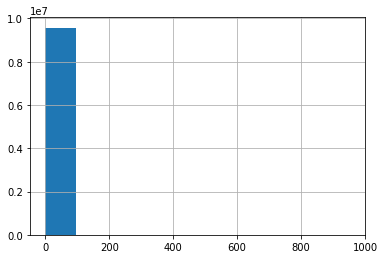

In [22]:
train['fare'].max()
train['fare'].hist()

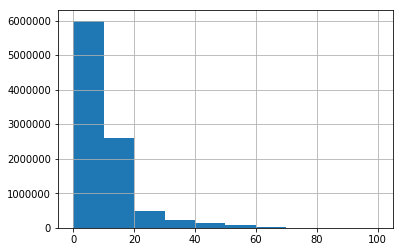

In [23]:
train = train[train['fare'] <= 100]
train['fare'].hist()

In [24]:
train['eucd_dist'] = ((train['pick_lat']-train['drop_lat'])**2 + (train['pick_long'] - train['drop_long'])**2)**0.5

In [25]:
test['eucd_dist'] = ((test['pick_lat']-test['drop_lat'])**2 + (test['pick_long'] - test['drop_long'])**2)**0.5

In [26]:
train['eucd_dist'].head()

0    0.009436
1    0.079696
2    0.013674
3    0.025340
4    0.019470
Name: eucd_dist, dtype: float64

In [27]:
train['hour'] = train.date_time.dt.hour
test.head()

,key,date_time,pick_long,pick_lat,drop_long,drop_lat,pass_count,eucd_dist
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,0.021554
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,0.023180
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.005870
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,0.018649
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,0.050631


In [28]:
test['hour'] = test.date_time.dt.hour

**Question 1** - I did the following things to clean the data
* Some features of some data points were missing (NaN). I dropped 
those values as they may affect the accuracy of the classifier.
* For some data points, the passenger count was 208, which is ridiculous. T
he maximum passengers NYC cabs can carry are 5. 
I deleted those data points for which the passenger count was more than 5.
* For some data points, the fare was negative which cant be true. 
I deleted those data points for which the fare was less than zero.
* For one data point, there was a fare which was around 508. This can't be true. 
This was an outlier. So, I deleted those fares which were greater than 100. Fares 
can be greater than 100 but they will mostly be those fares which will be travelling
to other neighbouring cities(which may also include some toll to be paid). For this
project, we've to predict the taxi fare within New York city so it's okay if we 
remove those data points which have fare greater than 100.
* For simplicity during data processing, I changed the names of the columns and 
replaced them with much easier column names.
* The test set had a restricted pickup and dropoff latitude and longitude. 
The training set had some noisy entries in the latitude and longitude section.
The minimum latitude of training set was in the three thousands. So, I restricted
the latitude and the longitude of the training set within the bounds of the test
set.
* The UTC part which was associated with the date was automatically removed 
by pandas in "parse_dates" function argument.

In [29]:
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [30]:
train['haver_dist'] = haversine_np(train['pick_long'],train['pick_lat'],train['drop_long'],train['drop_lat'])

In [31]:
test['haver_dist'] = haversine_np(test['pick_long'],test['pick_lat'],test['drop_long'],test['drop_lat'])

In [32]:
from scipy.stats.stats import pearsonr
pearsonr(x=train['hour'],y = train['fare'])

(-0.01743475647968236, 0.0)

In [33]:
pearsonr(x= train['eucd_dist'], y = train['fare'])

(0.8418814148544824, 0.0)

In [34]:
pearsonr(x= train['haver_dist'], y = train['fare'])

(0.8332895188554852, 0.0)

In [35]:
pearsonr(x = train['eucd_dist'], y = train['hour'])

(-0.028279711121828463, 0.0)

In [36]:
pearsonr(x = train['haver_dist'], y = train['hour'])

(-0.02765667701433868, 0.0)

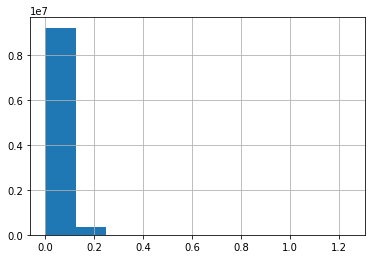

In [37]:
train['eucd_dist'].hist()

In [38]:
train = train[train['haver_dist'] <= 50]

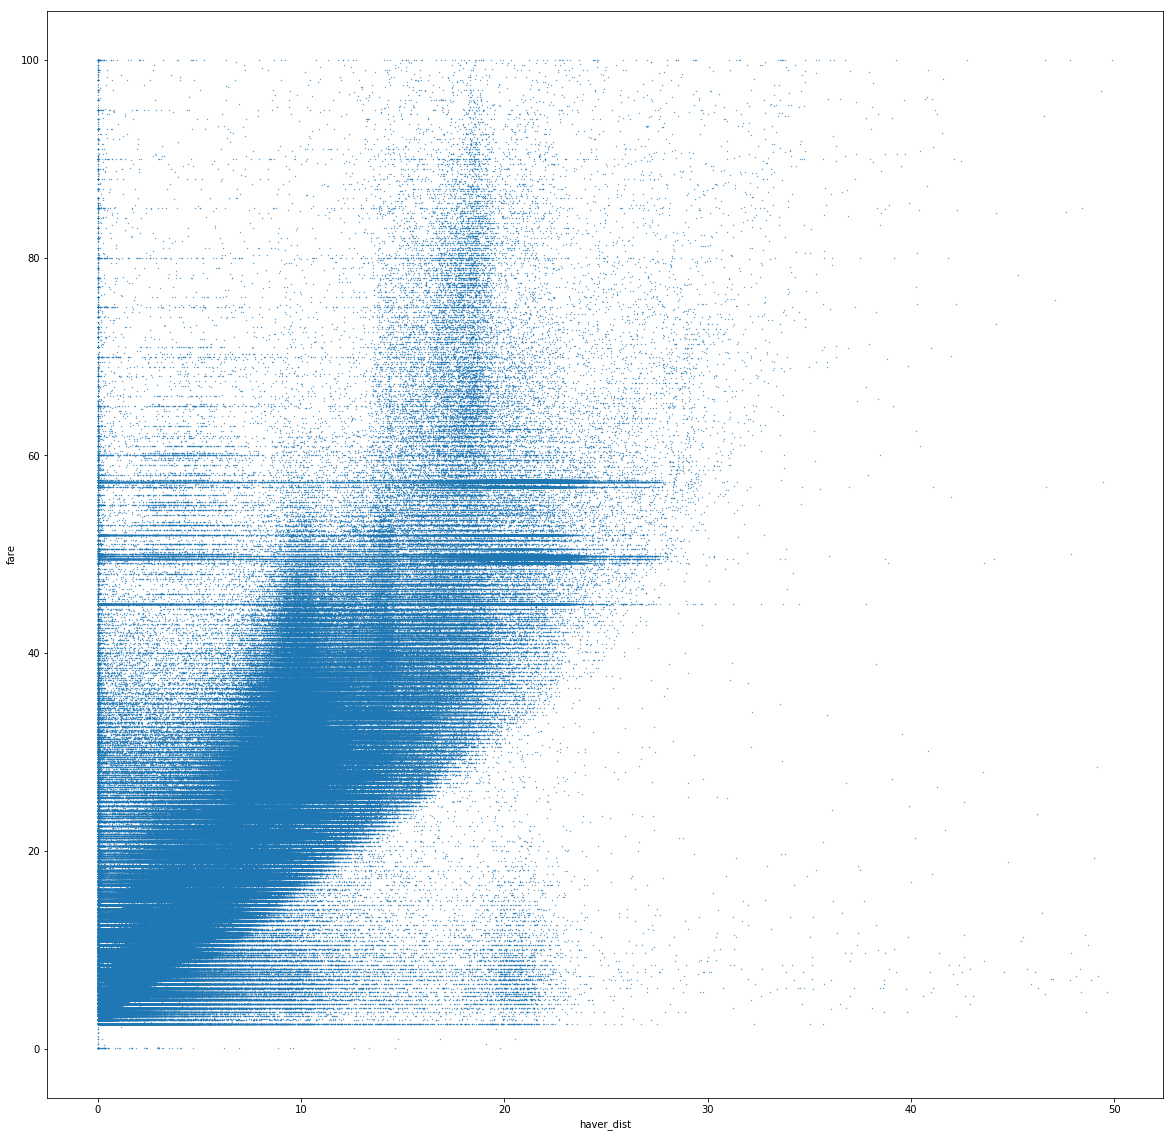

In [39]:
train.plot.scatter(x = 'haver_dist', y = 'fare', s = 0.1, figsize = (20,20))

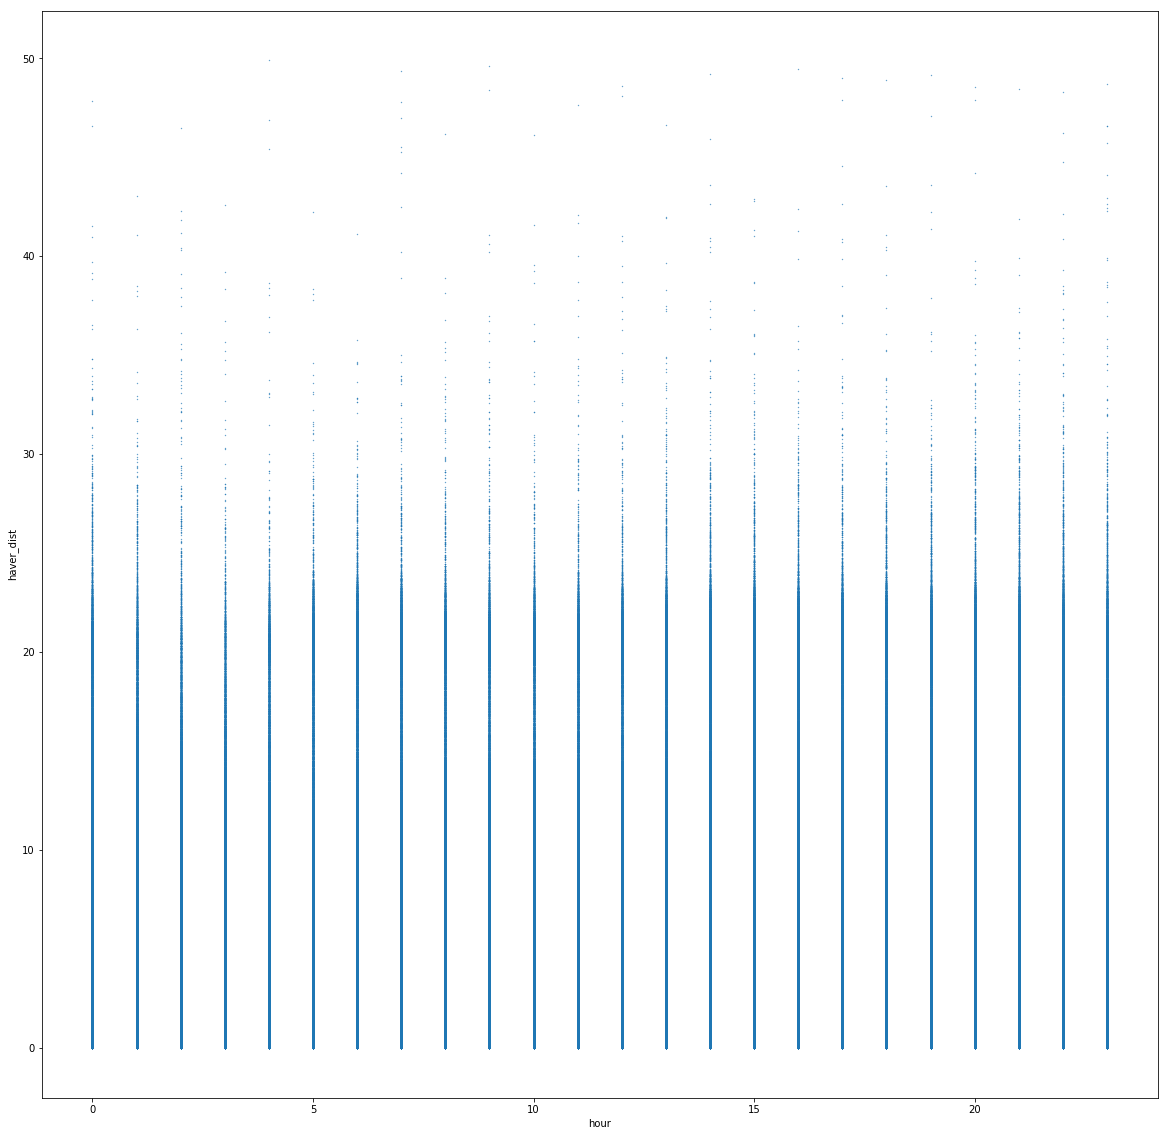

In [40]:
train.plot.scatter(x = 'hour', y = 'haver_dist', s = 0.1, figsize = (20,20))

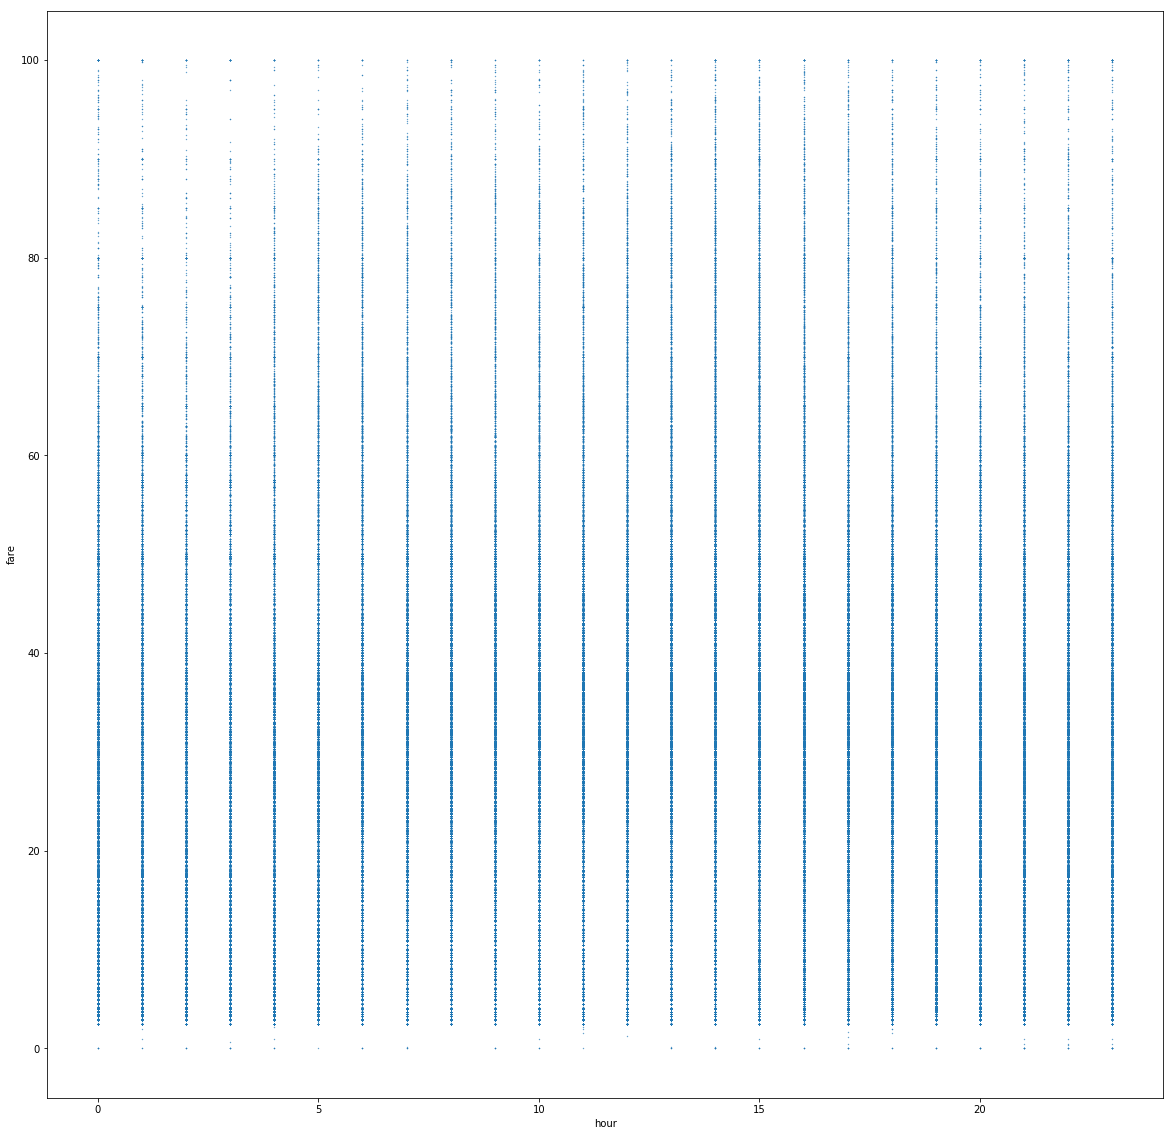

In [41]:
train.plot.scatter(x = 'hour', y = 'fare', s = 0.1, figsize = (20,20))

**Question2**
* I calculated the Euclidean distance as well as the haversine distance. 
https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
Haversine distance takes into consideration the radius of the curvature of the earth
while measuring distance between two points. In this case the curvature is very small
between 2 points, but the distance returned is in kilometers.
* The pearson coeff for Euclidean distance and fare is 0.8418814148544824
* The pearson coeff for Haversine distance and fare is 0.8332895188554852,
which is similar to that of Euclidean distance.
* The pearson coeff for time of the day and distance travelled is -0.02765667701433868
* The pearson coeff for time of the day and fare is -0.01743475647968236


**Question 3**
* The plot for distance and fare increases linearly. As distance increases, the fare
increases, which is what actually happens.
* The plot for time of day and distance traveled doesn't really give us any insights.
* The plot for time of the day and taxi fare should've discovered something as the
fare for night is more than the fare for the day. But, this graph also doesn't really
tell us anything. The reason can be this - even thoug the fares are more during the 
night, the distance travelled by the taxis is may be less. 
So, the fare ends up being the same as that of the distance travelled during the 
day.


In [42]:
def select_within_boundingbox(df, BB):
    return (df.pick_long >= BB[0]) & (df.pick_long <= BB[1]) & \
           (df.pick_lat >= BB[2]) & (df.pick_lat <= BB[3]) & \
           (df.drop_long >= BB[0]) & (df.drop_long <= BB[1]) & \
           (df.drop_lat >= BB[2]) & (df.drop_lat <= BB[3])
            

def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        
    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pick_long, df[idx].pick_lat, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].drop_long, df[idx].drop_lat, c=c[1], s=0.01, alpha=0.5)

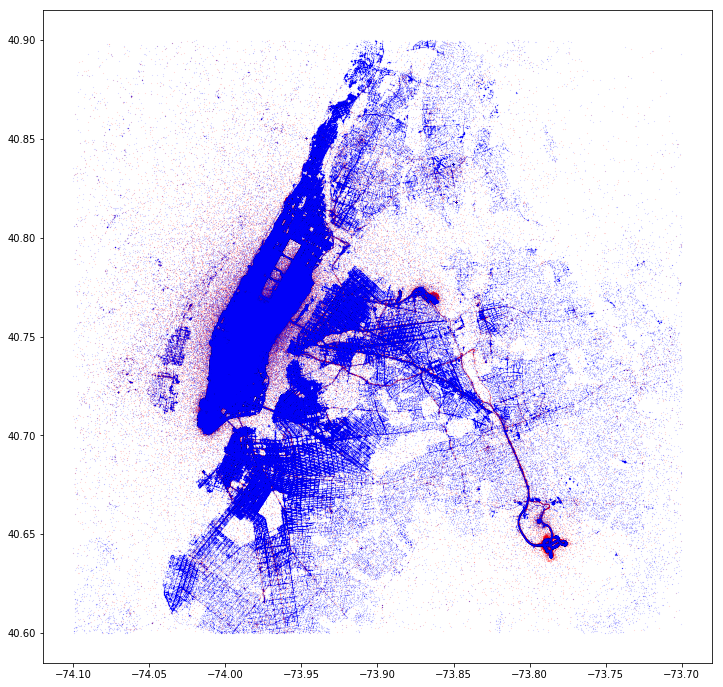

In [43]:
plot_hires(train, (-74.1, -73.7, 40.6, 40.9))

**Question 4**
* After plotting the pickup and dropoff locations within the bounding latitude
and longitude of NYC, there are so many data points that the scatter plot reveals 
the entire map of NYC. This plot was taken from 
https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration.
* Upon plotting the data points, one can see that the training data is noisy and also 
contains some pickup points which lie in the water.
* There are methods to remove these data points, but they are very complicated.
I wan't able to understand those methods.
* One method that I had thought which can be used to remove the data points on
water was to take all the data point which were along the manhattan coastline and
take their average. 
* After that, choose a range and those points which are beyond those range will lie
in the water.
* The problem with this is that even though the points in the water will be gone,
the points which are in the rest of the Manhattan and other parts like Brooklyn,
Bronx, Queens will also be removed.

In [44]:
def airport_distcalc(dataset):
    jfk_co = (40.639722, -73.778889)
    sol_co = (40.6892,-74.0445) # Statue of Liberty
    lga_co = (40.77725, -73.872611)
    nyc_co = (40.7141667,-74.0063889) 
    ewr_co = (40.6925, -74.168611)
    
    pick_lat = dataset['pick_lat']
    drop_lat = dataset['drop_lat']
    pick_long = dataset['pick_long']
    drop_long = dataset['drop_long']
    
    pick_jfk = haversine_np(pick_lat, pick_long, jfk_co[0], jfk_co[1]) 
    drop_jfk = haversine_np(jfk_co[0], jfk_co[1], drop_lat, drop_long) 
    pick_ewr = haversine_np(pick_lat, pick_long, ewr_co[0], ewr_co[1])
    drop_ewr = haversine_np(ewr_co[0], ewr_co[1], drop_lat, drop_long) 
    pick_lga = haversine_np(pick_lat, pick_long, lga_co[0], lga_co[1]) 
    drop_lga = haversine_np(lga_co[0], lga_co[1], drop_lat, drop_long)
    pick_sol = haversine_np(pick_lat, pick_long, sol_co[0], sol_co[1]) 
    drop_sol = haversine_np(sol_co[0], sol_co[1], drop_lat, drop_long)
    pick_nyc = haversine_np(pick_lat, pick_long, nyc_co[0], nyc_co[1]) 
    drop_nyc = haversine_np(nyc_co[0], nyc_co[1], drop_lat, drop_long)
    
    dataset['jfk_dist'] = pick_jfk + drop_jfk
    dataset['ewr_dist'] = pick_ewr + drop_ewr
    dataset['lga_dist'] = pick_lga + drop_lga
    dataset['sol_dist'] = pick_sol + drop_sol

In [45]:
airport_distcalc(train)

In [46]:
airport_distcalc(test)

In [47]:
train['day'] = train.date_time.dt.dayofweek 
train['month'] = train.date_time.dt.month

In [48]:
test['day'] = test.date_time.dt.dayofweek 
test['month'] = test.date_time.dt.month

**Question 5**
* The additional features generated (apart from Euclidean and Haver distance) are 
distance from jfk, neward liberty airport, la guardia airport , statue of liberty and
penn station.
* The taxi fares are the costliest in these regions, for pickups as well as dropoffs.
* The total distance from the current location of the pickup and the dropoff to these 
location is considered and their sum is taken.
* In this way, if the pickup or dropoff is at any of these location, the sum of those
distances will be lesser as compared to those data points whose pickup or dropoff
is not at any of these locations.
* Due to this, the Linear regression will be able to relate that if the distance is less,
the fare will be more and vice - versa.
* In addition to these, day of the week, hour of the day, month of the year are also 
added.
* Day of the week may be able to provide insights, i.e maybe the cabs travel less
distance on Saturdays and Sundays, due to weekend.
* Hour of the day may be able to provide insights about the distance travelled 
for rush hours.
* Month of the year may be able to provide insights about the distance travelled
during the holiday season.

In [ ]:
test.head()

In [49]:
trainX = train[['pick_long','pick_lat','drop_long','drop_lat','pass_count','hour','haver_dist','jfk_dist','ewr_dist','lga_dist','sol_dist','day', 'month']]

In [50]:
testX = test[['pick_long','pick_lat','drop_long','drop_lat','pass_count','hour','haver_dist','jfk_dist','ewr_dist','lga_dist','sol_dist','day', 'month']]

In [51]:
trainY = train[['fare']]

In [52]:
testX.shape

(9914, 13)

In [53]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
regr = linear_model.LinearRegression()
regr.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
coeff = regr.coef_
coeff

array([[ 2.09623078e+02, -2.19984352e+00,  1.99260584e+02,
        -1.88246833e+01,  3.16265830e-03,  1.20256427e-02,
         2.11333709e+00,  4.16727694e-02, -2.85098174e+00,
        -6.35868494e-02,  1.16823499e+00, -4.15365530e-02,
         3.69556730e-02]])

In [56]:
coeff = pd.DataFrame(coeff, columns = ['pick_long','pick_lat','drop_long','drop_lat','pass_count','hour','haver_dist','jfk_dist','ewr_dist','lga_dist','sol_dist','day', 'month'])

In [57]:
coeff.head()

,pick_long,pick_lat,drop_long,drop_lat,pass_count,hour,haver_dist,jfk_dist,ewr_dist,lga_dist,sol_dist,day,month
0,209.623078,-2.199844,199.260584,-18.824683,0.003163,0.012026,2.113337,0.041673,-2.850982,-0.063587,1.168235,-0.041537,0.036956


In [59]:
pred_Y = regr.predict(testX)

In [60]:
pred_Y.shape

(9914, 1)

In [61]:
pred_Y = pd.DataFrame(pred_Y, columns = ['fare_amount'])

In [62]:
pred_Y.head()

,fare_amount
0,9.113586
1,8.911380
2,5.443024
3,8.293786
4,15.955003


In [63]:
result = test['key']

In [64]:
result = pd.concat([result,pred_Y],axis = 1)

In [65]:
result.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.113586
1,2015-01-27 13:08:24.0000003,8.911380
2,2011-10-08 11:53:44.0000002,5.443024
3,2012-12-01 21:12:12.0000002,8.293786
4,2012-12-01 21:12:12.0000003,15.955003


In [66]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv(index = False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
df = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))

# create a link to download the dataframe
create_download_link(result)

In [67]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start = '2009-01-01', end = '2015-12-31').to_pydatetime()

train['holiday'] = train.date_time.apply(lambda x:1 if x in holidays else 0)
test['holiday'] = test.date_time.apply(lambda x:1 if x in holidays else 0)

In [68]:
train['year'] = train.date_time.dt.year
test['year'] = test.date_time.dt.year

In [ ]:
train.head()

In [69]:
trainX = train[['pick_long','pick_lat','drop_long','drop_lat','pass_count','hour','haver_dist','jfk_dist','ewr_dist','lga_dist','sol_dist','day', 'month','holiday','year']]
testX = test[['pick_long','pick_lat','drop_long','drop_lat','pass_count','hour','haver_dist','jfk_dist','ewr_dist','lga_dist','sol_dist','day', 'month','holiday','year']]

In [70]:
trainY = train['fare']

In [ ]:
train.head()

In [ ]:
trainY.head()

In [71]:
testX.shape

(9914, 15)

In [72]:
regr1 = linear_model.LinearRegression()
regr1.fit(trainX, trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
pred_Y1 = regr1.predict(testX)

In [74]:
pred_Y1 = pd.DataFrame(pred_Y1, columns = ['fare_amount'])

In [75]:
pred_Y1.shape

(9914, 1)

In [80]:
result1 = test['key']

In [81]:
result1 = pd.concat([result1,pred_Y1],axis = 1)

In [82]:
result1.shape

(9914, 2)

In [79]:
result1.head()

,key,fare_amount,fare_amount
0,2015-01-27 13:08:24.0000002,9.113586,10.603274
1,2015-01-27 13:08:24.0000003,8.911380,10.389326
2,2011-10-08 11:53:44.0000002,5.443024,5.192240
3,2012-12-01 21:12:12.0000002,8.293786,8.609496
4,2012-12-01 21:12:12.0000003,15.955003,16.249308


In [84]:
result1.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.603274
1,2015-01-27 13:08:24.0000003,10.389326
2,2011-10-08 11:53:44.0000002,5.192240
3,2012-12-01 21:12:12.0000002,8.609496
4,2012-12-01 21:12:12.0000003,16.249308


In [85]:
create_download_link(result1)